In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import stats

In [2]:
rng = np.random.default_rng()
start = time.time()
vals = rng.normal(loc=100, scale=5, size=100_000_000)
# print(vals)
print(time.time()-start)

2.4614131450653076


In [3]:
rng = np.random.Generator(np.random.PCG64(123))
start = time.time()
vals = rng.normal(loc=100, scale=5, size=100_000_000)
print(vals)
print(time.time()-start)

[ 95.05439325  98.16106674 106.43962631 ...  93.47126337  96.12163465
  94.73865754]
2.551173210144043


In [4]:
rng = np.random.Generator(np.random.SFC64(123))
start = time.time()
vals = rng.normal(loc=100, scale=5, size=100_000_000)
print(vals)
print(time.time()-start)

[102.86176945 110.09267515 100.01675171 ...  96.26420573 108.69850397
 102.3430577 ]
2.3327603340148926


In [5]:
rng = np.random.Generator(np.random.Philox(123))
start = time.time()
vals = rng.normal(loc=100, scale=5, size=100_000_000)
print(vals)
print(time.time()-start)

[ 98.64161034 101.71986797  88.92563187 ... 105.07795769 102.07667306
 106.01465236]
5.407534122467041


In [18]:
rng = np.random.Generator(np.random.SFC64(seed=1))
start = time.time()
vals = rng.normal(loc=100, scale=5, size=100_000_000)
print(vals)
print(time.time()-start)

[105.57062694 107.46672826  96.01615819 ...  99.54815189  92.21575885
  98.6624866 ]
2.2080917358398438


In [22]:
rng = np.random.Generator(np.random.SFC64(seed=1))

In [27]:
rng.normal(loc=100, scale=5)

100.85299552682152

In [13]:
print(f"{vals[0]:.50f}")

98.64161034114468407096865121275186538696289062500000


We have a lot of digits we actually do not need. I did not find a way to simply the random generations.

# I will use SFC64 as it is a little faster

In [122]:
rng = np.random.Generator(np.random.SFC64(seed=123))
start = time.time()
vals = rng.normal(loc=100, scale=5, size=100_000)
print(vals)
print(time.time()-start)

[102.86176945 110.09267515 100.01675171 ...  99.41167451 104.80029549
 100.29640935]
0.00399017333984375


In [123]:
rng = np.random.Generator(np.random.SFC64(seed=123))
start = time.time()
vals = np.zeros(100_000)
for i in range(100_000):
    vals[i] = rng.normal(loc=100, scale=5)
print(vals)
print(time.time()-start)

[102.86176945 110.09267515 100.01675171 ...  99.41167451 104.80029549
 100.29640935]
0.3959391117095947


## The second approach is about 100 times slower!

In [126]:
def transform(x):
    return 5*x**2 + 3*x + 5


transform_v = np.vectorize(transform)

In [135]:
rng = np.random.Generator(np.random.SFC64(seed=123))
start = time.time()
vals = rng.normal(loc=100, scale=5, size=1000_000)
result = transform_v(vals)
print(result)
print(time.time()-start)

[53216.30337646 60937.26363379 50321.80336634 ... 54306.24577827
 52452.1497821  44664.34340554]
0.6682054996490479


In [137]:
rng = np.random.Generator(np.random.SFC64(seed=123))
start = time.time()
vals = np.zeros(1000_000)
result = np.zeros(1000_000)
for i in range(1000_000):
    value = rng.normal(loc=100, scale=5)
    vals[i] = value
    result[i] = transform(value)
print(result)
print(time.time()-start)

[53216.30337646 60937.26363379 50321.80336634 ... 54306.24577827
 52452.1497821  44664.34340554]
5.156207323074341


## The second approach is about 10 times slower!

# Generator quality assesment
did not manage to evalaute

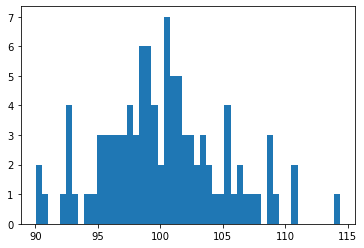

array([ 97.86131478, 103.7910947 ,  90.58361694,  99.26750512,
        96.98038994,  97.56120143, 101.25739828,  95.81224228,
        98.21777777,  98.17209967, 103.1304174 ,  97.77930502,
       101.12809392,  96.14255716, 100.88015333, 107.04536174,
       105.53314057, 101.55009828, 100.34204712, 106.5345854 ,
       100.40251958, 101.57464563,  92.67740149,  98.85183985,
       106.11832534, 103.46374336,  99.8491093 ,  96.63891671,
       102.84846532, 100.75409023,  99.32598354, 105.04727721,
        98.41707056,  98.61864665, 102.61084989, 106.03349072,
       107.23658433, 101.96747386,  98.90013702, 104.30281557,
        95.61401073,  98.33354665,  98.98185299,  95.32497252,
        98.97214222,  96.68997134,  98.61446434,  99.77674378,
        98.41183097, 114.39820718,  94.16750558, 100.69952233,
       110.54014021,  93.24362074,  96.3316758 , 100.97605957,
        95.02825435,  90.48285652, 103.41361828,  92.22084124,
       100.76718945, 109.02732753, 100.53265061,  99.44

In [101]:
rng = np.random.Generator(np.random.SFC64(seed=12394))
# start = time.time()
vals = rng.normal(loc=100, scale=5, size=100)
plt.hist(vals, bins=50)
plt.show()
vals

KstestResult(statistic=1.0, pvalue=0.0)


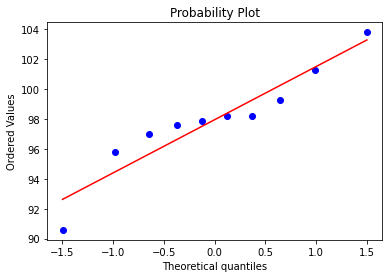

In [94]:
# nsample = 10
# np.random.seed(76543215)
# ax1 = plt.subplot(221)
# x = stats.t.rvs(3, size=nsample)
# vals = np.linspace(1,5, 5)
res = stats.probplot(vals, plot=plt)
print(stats.kstest(vals, stats.norm.cdf, N=2))
# print(res)

In [103]:
np.random.seed(987654322)
vals = stats.t.rvs(100, size=100)
stats.kstest(vals, 'norm')

KstestResult(statistic=0.07521486184031223, pvalue=0.5967516206604742)

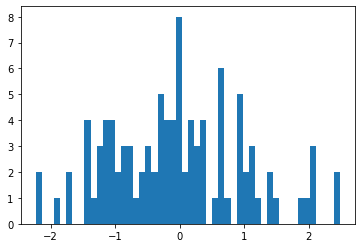

In [105]:
plt.hist(vals, bins=50)
plt.show()

In [148]:
from numpy.polynomial.polynomial import polyval
polyval(3, [0,2.623366,1.286214563222])

19.446029068997998

In [153]:
coeff = [0.0000007767022, -0.0001274371, 0.009855391, -0.3915159, 33.00943, 19.72485]
coeff[::-1]

    

[19.72485, 33.00943, -0.3915159, 0.009855391, -0.0001274371, 7.767022e-07]